In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import control

from continuous_cost import *
from discrete_cost import *

In [5]:
T = 6.0
N = 100
tau = T / N
t = np.linspace(0, T, N+1)

A = np.array([[0.5, 0.5],
              [1, 0]])
B = np.array([[1],
              [0]])

Q = np.eye(2)
R = np.array([[1.0]])

x0 = np.array([[4.0],
               [10.0]])

In [26]:
DiscreteCost(A, B, Q, R, x0, T, 20)

387.160574101804

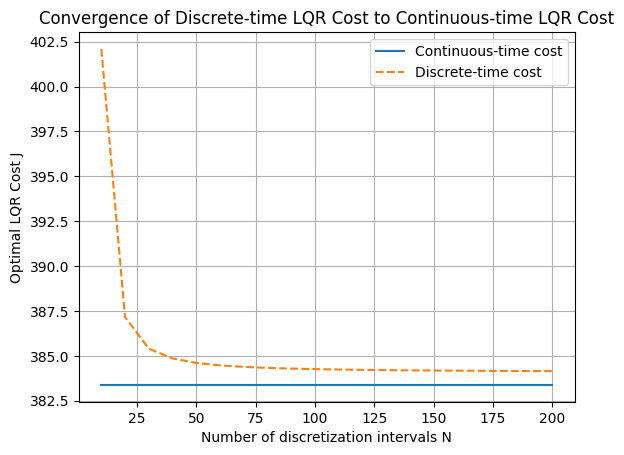

In [6]:
Nspace = np.arange(10, 201, 10)

Jc = []
Jd = []

for N in Nspace:
    J_cont = ContinuousCost(A, B, Q, R, x0, T)
    Jc.append(J_cont)
    J_disc = DiscreteCost(A, B, Q, R, x0, T, N)
    Jd.append(J_disc)
    
plt.plot(Nspace, Jc, label='Continuous-time cost')
plt.plot(Nspace, Jd, label='Discrete-time cost', linestyle='--')
plt.xlabel('Number of discretization intervals N')
plt.ylabel('Optimal LQR Cost J')
plt.title('Convergence of Discrete-time LQR Cost to Continuous-time LQR Cost')
plt.legend()
plt.grid()
plt.show()

In [7]:

data = np.column_stack((Nspace, Jd))

np.savetxt(
    "DiscreteCost.csv",
    data,
    delimiter=",",
    header="N,Cost",
    comments=""
)

N=10, T=6.0, Jc[-1]=383.3826208990186, J_disc=402.0932091958031, J_norm=np.float64(0.13556654252631525)
N=20, T=6.0, Jc[-1]=383.3826208990186, J_disc=387.160574101804, J_norm=np.float64(0.1094918118883205)
N=30, T=6.0, Jc[-1]=383.3826208990186, J_disc=385.405152849343, J_norm=np.float64(0.13188730005429125)
N=40, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.8566595184523, J_norm=np.float64(0.17088105709320367)
N=50, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.6087009931463, J_norm=np.float64(0.22208740391368623)
N=60, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.47261365171306, J_norm=np.float64(0.2843093800492214)
N=70, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.3884493305947, J_norm=np.float64(0.35709606525182064)
N=80, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.33201391911524, J_norm=np.float64(0.44024160760007236)
N=90, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.2919008130711, J_norm=np.float64(0.5336391623127277)
N=100, T=6.0, Jc[-1]=383.3826208990186, J_disc=384.2621085028551, J

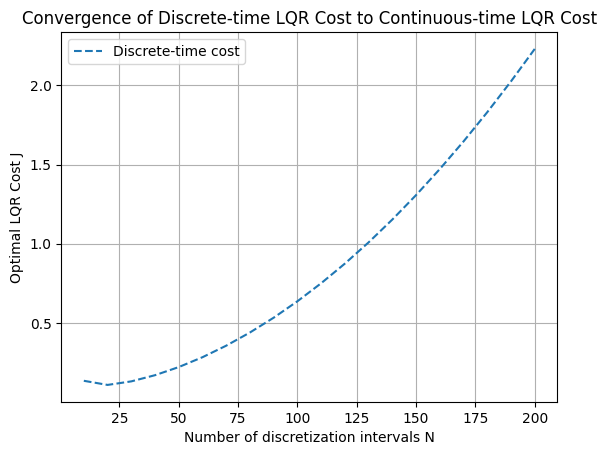

In [23]:
Nspace = np.arange(10, 201, 10)

Jc = []
Jd = []

for N in Nspace:
    J_cont = ContinuousCost(A, B, Q, R, x0, T)
    Jc.append(J_cont)
    J_disc = DiscreteCost(A, B, Q, R, x0, T, N)
    J_norm = ((N**2 / T**2) * (J_disc - Jc[-1]) / Jc[-1])
    # print(f"N={N}, {(N**2 / T**2)}, Discrete Cost={DiscreteCost(A, B, Q, R, x0, T, N)}, Continuous Cost={Jc[-1]}")
    print(f"N={N}, {T=}, {Jc[-1]=}, {J_disc=}, {J_norm=}")
    Jd.append(J_norm)
    
# plt.plot(Nspace, Jc, label='Continuous-time cost')
plt.plot(Nspace, Jd, label='Discrete-time cost', linestyle='--')
plt.xlabel('Number of discretization intervals N')
plt.ylabel('Optimal LQR Cost J')
plt.title('Convergence of Discrete-time LQR Cost to Continuous-time LQR Cost')
plt.legend()
plt.grid()
plt.show()

In [10]:
N**2 / T**2 

np.float64(1111.111111111111)